## King County House Prices Prediction - Regression Project

### Author: Henrique Proba

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../input/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* id: notation for a house
* dateDate: house was sold
* pricePrice: is prediction target
* bedroomsNumber: Bedrooms/House
* bathroomsNumber: bathrooms/House
* sqft_livingsquare: footage of the home
* sqft_lotsquare: footage of the lot
* floorsTotal: floors (levels) in house
* waterfrontHouse: which has a view to a waterfront
* viewHas: been viewed
* condition: How good the condition is ( Overall )
* gradeoverall: grade given to the housing unit, based on King County grading system
* sqft_abovesquare: footage of house apart from basement
* sqft_basementsquare: footage of the basement
* yr_builtBuilt: Year
* yr_renovatedYear: when house was renovated
* zipcode: zip
* lat: Latitude coordinate
* long: Longitude coordinate
* sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15lot: Size area in 2015(implies-- some renovations)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
year_sold = df['date'].apply(lambda x: int(x[0:4]))
df.insert(loc=5, column='year_sold', value=year_sold)

In [6]:
df.drop('date', axis=1, inplace=True)

In [12]:
features = df.iloc[:,2:].columns.tolist()
target = df.iloc[:,1].name

In [13]:
from scipy.stats import pearsonr
corrs_dict = {}
for f in features:
    data_temp = df[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' X ' + target
    corrs_dict[key] = pearsonr(x1,x2)[0]

In [14]:
df_corr = pd.DataFrame(corrs_dict, index=['Value']).T
df_corr.loc[df_corr['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living X price,0.702035
grade X price,0.667434
sqft_above X price,0.605567
sqft_living15 X price,0.585379
bathrooms X price,0.525138
view X price,0.397293
sqft_basement X price,0.323816
bedrooms X price,0.308350
lat X price,0.307003
waterfront X price,0.266369


In [83]:
#feature_col=['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'sqft_basement','bedrooms', 'lat', 'waterfront','yr_built']
feature_col=['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement','bedrooms', 'lat', 'waterfront','yr_built']
df_ml = df[feature_col]
df_ml.head()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,yr_built
0,221900.0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,1955
1,538000.0,2570,7,2170,1690,2.25,0,400,3,47.7210,0,1951
2,180000.0,770,6,770,2720,1.00,0,0,2,47.7379,0,1933
3,604000.0,1960,7,1050,1360,3.00,0,910,4,47.5208,0,1965
4,510000.0,1680,8,1680,1800,2.00,0,0,3,47.6168,0,1987


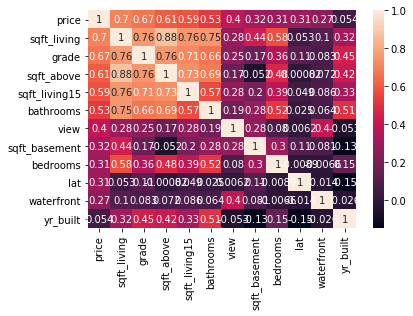

In [84]:
corr = df_ml.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

4.024069144684712


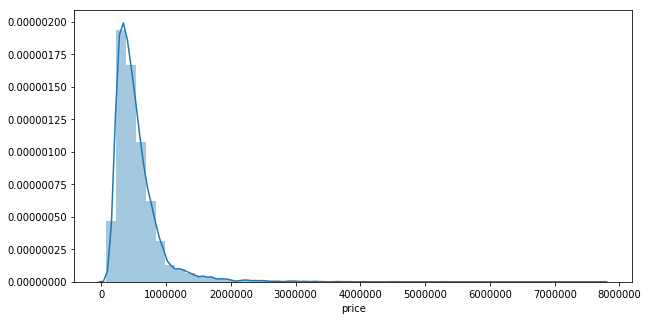

In [85]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(df_ml['price'])
price_skew = df_ml['price'].skew(axis = 0, skipna = True) 
print(price_skew)

**> As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed.**

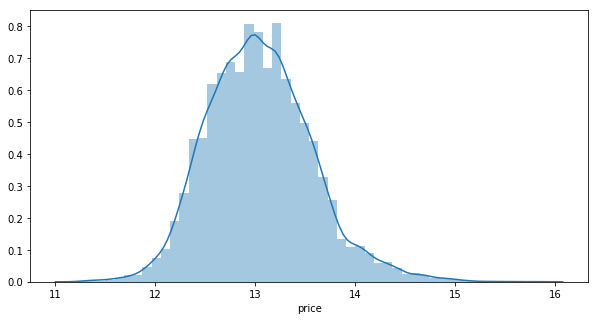

In [86]:
import numpy as np
df_ml['price'] = np.log(df.price)
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(df_ml['price'])

### Predicting House Prices

#### Linear Regression

In [87]:
y= df_ml['price'].values
X= df_ml.drop('price', axis=1).values

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import explained_variance_score
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [89]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

In [90]:
mlr.score(X_test,y_test)

0.7621343512687725

> 76.21% Not bad, but I think this accuracy can be improved!

In [91]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.19899734267202412
Mean Squared Error: 0.06609706083177697
Root Mean Squared Error: 0.2570934865603891


#### XGBoost

In [92]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.07, gamma=0, subsample=0.80 ,colsample_bytree=1, max_depth=7)
xgb_train, xgb_test = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.07, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [93]:
xgb_pred = xgb.predict(X_test)
print(explained_variance_score(xgb_pred,y_test))

0.8402476222293342


> Using XGBoost the model was able to return a 84.02% of accuracy! 